#### Read data

In [ ]:
import pandas as pd
import numpy as np
filename = "datos.xlsx"
df = pd.read_excel(filename)
df.head(10)

#### Clean data

In [34]:
columns_to_drop = [
    "id",
    "first_name",
    "last_name",
    "created_at",
    "updated_at"
]
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

#### Remove spaces

In [35]:
columns_to_clean = [
    "facultad",
    "sustento_economico",
    "promedio_secundaria",
    "vive_con",
    "formacion_academica_padre",
    "formacion_academica_hermanos",
    "formacion_academica_madre",
    "situacion_ocupacional",
    "posee_enfermedad"
]
df[columns_to_clean] = df[columns_to_clean].apply(lambda x: x.str.rstrip())

#### Drop rows with empty values

In [36]:
df.replace("-", np.nan, inplace=True)
df.replace("", np.nan, inplace=True)
df.dropna(inplace=True)

#### Remove duplicated values

In [37]:
df = df.drop_duplicates()

#### Identify missing values

In [ ]:
df.isnull().sum()

### Check numbers of active and abandon students

In [ ]:
abandon = df[df.iloc[:, 0] == 'A']
active = df[df.iloc[:, 0] == 'V']
graduated = df[df.iloc[:, 0] == 'E']
print(f"Total CA: {len(abandon)}")
print(f"Total CV: {len(active)}")
print(f"Total CE: {len(graduated)}")
print(f"Total: {len(df)}")

In [ ]:
df.head(100)

#### Numeric

##### Nro hijos

In [ ]:
df['nro_hijos'].value_counts()

##### Anio egreso

In [ ]:
df['anio_egreso'].value_counts()

##### Cuantos colegios secundaria

In [ ]:
df['cuantos_colegios_secundaria'].value_counts()

#### Convert "estado" column to "desercion" (A -> 1, V -> 0)

In [44]:
df['desercion'] = df['estado'].apply(lambda x: 1 if x == 'A' else 0)
df = df.drop('estado', axis=1)

#### Categorical variable encoding

##### Facultad

In [45]:
df['facultad'].value_counts()
df = pd.get_dummies(df, columns=['facultad'], drop_first=True)

##### Estado civil

In [46]:
df = pd.get_dummies(df, columns=['estado_civil'], drop_first=True)

##### Promedio secundaria

In [47]:
df = pd.get_dummies(df, columns=['promedio_secundaria'], drop_first=True)

##### Posee enfermedad

In [48]:
df = pd.get_dummies(df, columns=['posee_enfermedad'], drop_first=True)

##### Con quien/es reside

In [49]:
df = pd.get_dummies(df, columns=['vive_con'], drop_first=True)

##### Situacion ocupacional

In [50]:
df = pd.get_dummies(df, columns=['situacion_ocupacional'], drop_first=True)

##### Sustento económico

In [51]:
df = pd.get_dummies(df, columns=['sustento_economico'], drop_first=True)

##### Formación del padre

In [52]:
df = pd.get_dummies(df, columns=['formacion_academica_padre'], drop_first=True)

##### Formación de la madre

In [53]:
df = pd.get_dummies(df, columns=['formacion_academica_madre'], drop_first=True)

##### Formación de hermanos


In [54]:
df = pd.get_dummies(df, columns=['formacion_academica_hermanos'], drop_first=True)

##### Transformar fecha de nacimiento a edad

In [55]:
# Parsear columna 'fecha_nac' a formato datetime
df['fecha_nac'] = pd.to_datetime(df['fecha_nac'])

# Crear una fecha de referencia en el año 2019 (fecha en la que se obtuvieron los datos)
fecha_datos = pd.to_datetime('2019-12-31')

# Calcular la edad restando la fecha de nacimiento de la fecha de los datos
df['edad'] = fecha_datos.year - df['fecha_nac'].dt.year

# Reemplazar valores de edad menores de 17 años por la edad base (17 años)
df.loc[df['edad'] < 17, 'edad'] = 17

# Verificar los cálculos
df[['fecha_nac', 'edad']].head()

# Eliminar columna 'fecha_nac'
df = df.drop('fecha_nac', axis=1)

#### Defining the features and target variable:

In [56]:
# "desercion" columns is our target variable (1 or 0)
X = df.drop('desercion', axis=1)  # Features
y = df['desercion']  # Target variable

# Check dimensions
print("Features dimensions (X):", X.shape)
print("Target variable dimension (y):", y.shape)

Features dimensions (X): (620, 37)
Target variable dimension (y): (620,)


#### Split the dataset into training (80%) and testing (20%)

In [57]:
from sklearn.model_selection import train_test_split

"""
Split the dataset into training (80%) and testing (20%)

test_size=0.2 specifies that 20% of the data will go into the test set, while 80% will be used for training.
random_state=42 ensures reproducibility. Keeping this value constant ensures get the same split every time run the code.
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the size of the training and testing sets
print("Training X set size:", X_train.shape)
print("Testing X set size:", X_test.shape)
print("Training y set size:", y_train.shape)
print("Testing y set size:", y_test.shape)


Training X set size: (496, 37)
Testing X set size: (124, 37)
Training y set size: (496,)
Testing y set size: (124,)


### Train models


Training and evaluating Decision Tree...

Decision Tree Results:
Accuracy: 0.97
Confusion Matrix:
 [[50  1]
 [ 3 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        51
           1       0.99      0.96      0.97        73

    accuracy                           0.97       124
   macro avg       0.96      0.97      0.97       124
weighted avg       0.97      0.97      0.97       124


Training and evaluating Logistic Regression...

Logistic Regression Results:
Accuracy: 0.94
Confusion Matrix:
 [[51  0]
 [ 8 65]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93        51
           1       1.00      0.89      0.94        73

    accuracy                           0.94       124
   macro avg       0.93      0.95      0.93       124
weighted avg       0.94      0.94      0.94       124


Training and evaluating Naive Bayes...

Naive B

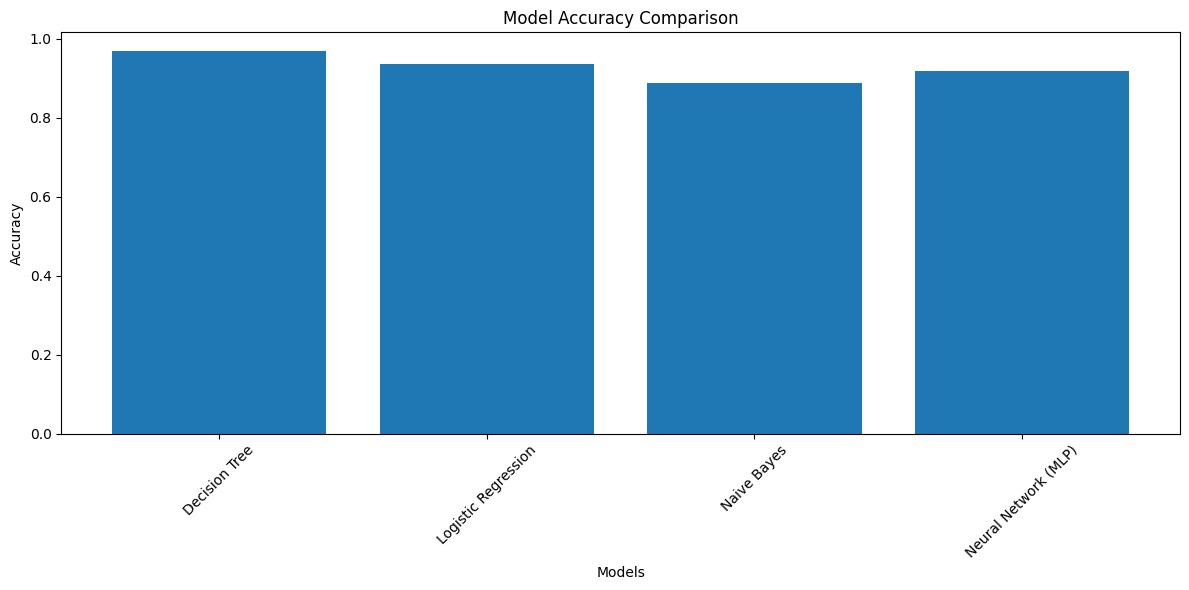


Cross-validation scores (5-fold):
Decision Tree: 0.99 (+/- 0.01)
Logistic Regression: 0.97 (+/- 0.03)
Naive Bayes: 0.83 (+/- 0.07)
Neural Network (MLP): 0.70 (+/- 0.26)

Model Summary (sorted by accuracy):
                  Model  Accuracy
0         Decision Tree  0.967742
1   Logistic Regression  0.935484
3  Neural Network (MLP)  0.919355
2           Naive Bayes  0.887097


In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier

# Define the models
models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=10, min_samples_split=20, class_weight='balanced', random_state=42),
    'Logistic Regression': LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000, solver='liblinear', random_state=42),
    'Naive Bayes': GaussianNB(var_smoothing=1e-8),
    'Neural Network (MLP)': MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', max_iter=1000, random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    print(f"\nTraining and evaluating {name}...")
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    conf_mat = confusion_matrix(y_test, y_pred)
    class_rep = classification_report(y_test, y_pred)
    
    # Store results
    results[name] = {
        'accuracy': accuracy,
        'confusion_matrix': conf_mat,
        'classification_report': class_rep
    }
    
    # Print results for each model
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:\n", conf_mat)
    print("Classification Report:\n", class_rep)

# Create a bar plot comparing accuracies
plt.figure(figsize=(12, 6))
accuracies = [results[model]['accuracy'] for model in models]
plt.bar(models.keys(), accuracies)
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate and display cross-validation scores
print("\nCross-validation scores (5-fold):")
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{name}: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")

# Create a summary DataFrame
summary_data = {
    'Model': list(models.keys()),
    'Accuracy': [results[model]['accuracy'] for model in models]
}
summary_df = pd.DataFrame(summary_data).sort_values('Accuracy', ascending=False)
print("\nModel Summary (sorted by accuracy):")
print(summary_df)

### Train Decision Tree model

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = DecisionTreeClassifier(max_depth=10, min_samples_split=20, class_weight='balanced', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
class_rep = classification_report(y_test, y_pred)

# Print results
print("Results:")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_mat)
print("Classification Report:\n", class_rep)

Results:
Accuracy: 0.97
Confusion Matrix:
 [[50  1]
 [ 3 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        51
           1       0.99      0.96      0.97        73

    accuracy                           0.97       124
   macro avg       0.96      0.97      0.97       124
weighted avg       0.97      0.97      0.97       124



### Check columns

In [ ]:
df.isnull().sum()

### Save the model

In [61]:
import joblib

# Save the model to a file
joblib.dump(model, 'model.pkl')

['model.pkl']

In [62]:
# Save the column names
model_columns = list(df.columns)
joblib.dump(list(df.columns), 'model_columns.pkl')

['model_columns.pkl']